# ALPHA VANTAGE API - Technical Indicators
______________________

## Collecting Information for stock/ETF Technical Analysis Using a Free API

In [2]:
# Import libraries
import os
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [3]:
# Read in the API Key (obtained at https://www.alphavantage.co/documentation/) 
apikey = os.getenv('ALPHA_VANTAGE_KEY')
ticker = 'TSLA'

# Company Overview

In [4]:
# Company overview
company_overview = f"https://www.alphavantage.co/query?function=OVERVIEW&symbol={ticker}&apikey={apikey}"
response_data = requests.get(company_overview).json()
response_data

{'Symbol': 'TSLA',
 'AssetType': 'Common Stock',
 'Name': 'Tesla, Inc',
 'Description': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits. It provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; and purchase financing and leasing services. This segment is also involved in the provision of non-warranty after-sales vehicle services, sale of used vehicles, retail merchandise, and vehicle insurance, as well as sale of products through its subsidiaries to third party customers; services for electric vehicles through its company-owned service locations, and Tesla mobile service technicians; and vehicle limite

# EMA - Exponential Moving Average

In [5]:
# Customize url to obtain EMA (exponential moving average) data
interval = 'daily'
time_period = '200'

ema = f"https://www.alphavantage.co/query?function=EMA&symbol={ticker}&interval={interval}&time_period={time_period}&series_type=close&apikey={apikey}"

response_data = requests.get(ema).json()
response_data.keys()

dict_keys(['Meta Data', 'Technical Analysis: EMA'])

In [6]:
ema = response_data['Technical Analysis: EMA']
# Create dataframe from json type response
ema_df = pd.DataFrame(ema)
# Transform dataframe 
ema_df = ema_df.T
# Convert data from object type to float type 
ema_df = ema_df.astype('float')
ema_df.iloc[:242]

,EMA
2021-04-07,547.5399
2021-04-06,546.2994
2021-04-05,544.8389
2021-04-01,543.3695
2021-03-31,542.1797
...,...
2020-04-28,96.1613
2020-04-27,95.5818
2020-04-24,94.9369
2020-04-23,94.4334


<AxesSubplot:title={'center':'EMA TSLA'}>

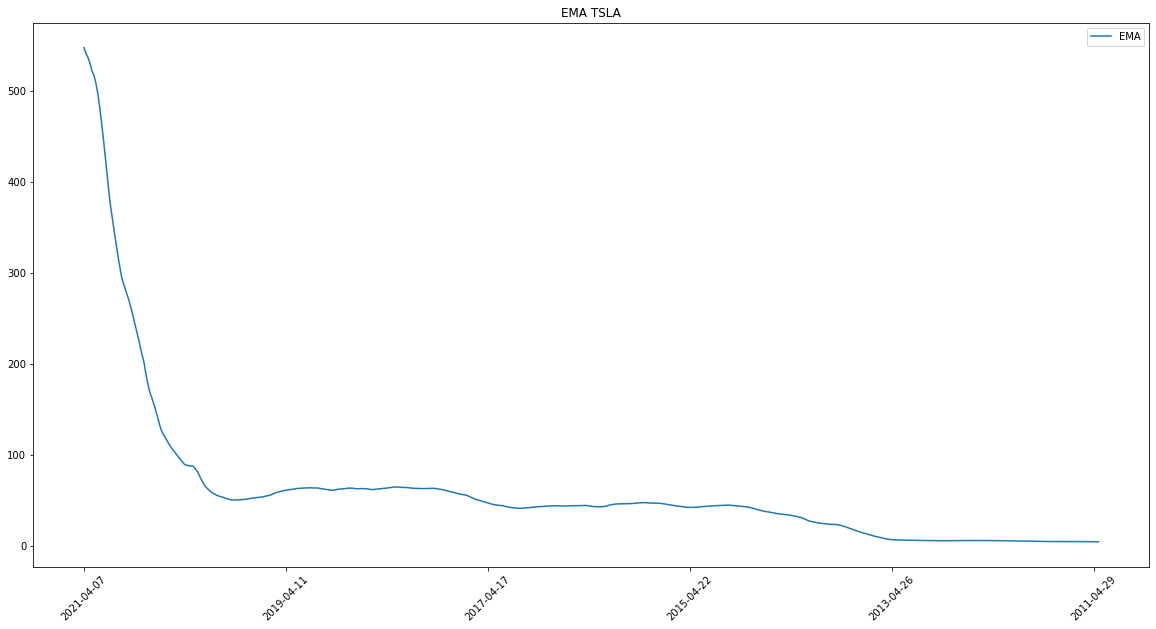

In [7]:
# Plot EMA
ema_df.plot(figsize=(20,10), title=f'EMA {ticker}', rot=45)

# MACD - Moving Average Convergence Divergence

In [8]:
# Customize the URL to create MACD request. Input interval. 
interval = 'daily'

macd = f"https://www.alphavantage.co/query?function=MACD&symbol={ticker}&interval={interval}&series_type=close&apikey={apikey}"

response_data = requests.get(macd).json()
response_data.keys()

dict_keys(['Meta Data', 'Technical Analysis: MACD'])

In [9]:
macd = response_data['Technical Analysis: MACD']
# Create dataframe from json type response
macd_df = pd.DataFrame(macd)
# Transform dataframe 
macd_df = macd_df.T
# Convert data from object type to float type 
macd_df = macd_df.astype('float').iloc[:242]
macd_df

,MACD_Hist,MACD,MACD_Signal
2021-04-07,8.2408,-10.5766,-18.8174
2021-04-06,8.7778,-12.0998,-20.8776
2021-04-05,7.1015,-15.9706,-23.0721
2021-04-01,4.2267,-20.6207,-24.8474
2021-03-31,2.6313,-23.2728,-25.9041
...,...,...,...
2020-04-28,2.9409,10.4348,7.4939
2020-04-27,3.3421,10.1007,6.7586
2020-04-24,3.0010,8.9241,5.9231
2020-04-23,3.6183,8.7912,5.1729


<AxesSubplot:title={'center':'MACD TSLA'}>

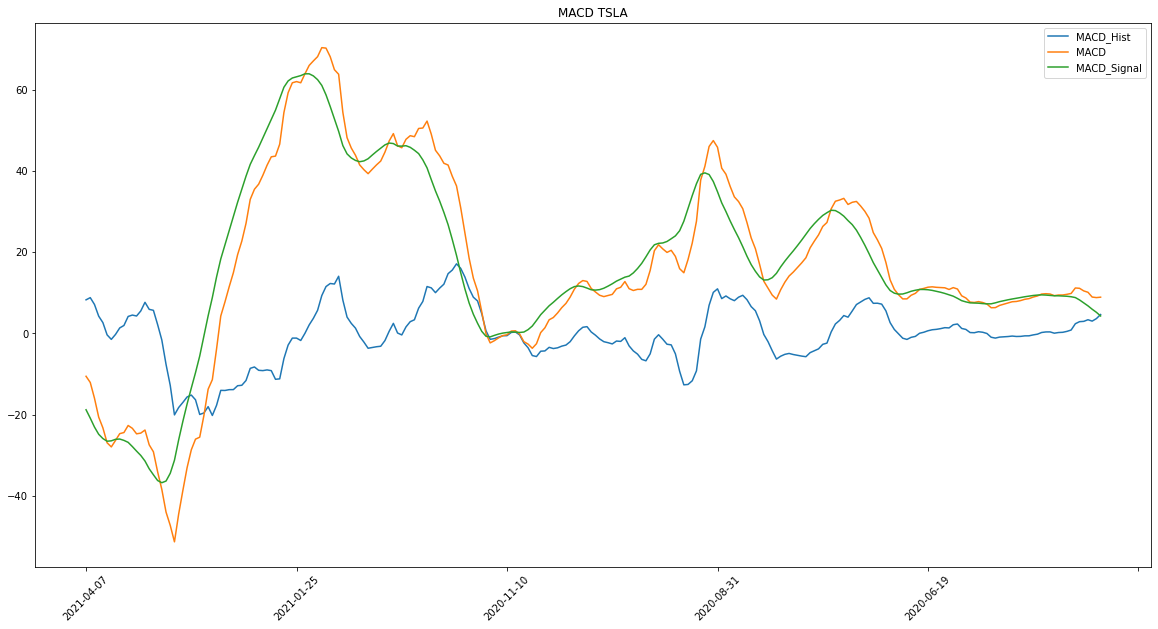

In [10]:
# Plot MACD and select number of datapoints to be plotted
macd_df.plot(figsize=(20,10), title=f'MACD {ticker}', rot=45)

# Bollinger Bands

In [11]:
# Create url request for Bollinger Bands and select time period
interval = 'daily'
time_period = '242'

bbands = f"https://www.alphavantage.co/query?function=BBANDS&symbol={ticker}&interval={interval}&time_period={time_period}&series_type=close&apikey={apikey}" 

response_data = requests.get(bbands).json() 
response_data.keys()

dict_keys(['Meta Data', 'Technical Analysis: BBANDS'])

In [12]:
bbands = response_data['Technical Analysis: BBANDS']
# Create dataframe from json type response
bbands_df = pd.DataFrame(bbands)
# Tranform datatframe
bbands_df = bbands_df.T
# Convert data from object type to float type 
bbands_df = bbands_df.astype('float').iloc[:242]
bbands_df

,Real Middle Band,Real Lower Band,Real Upper Band
2021-04-07,465.2636,23.5809,906.9463
2021-04-06,463.0585,20.1792,905.9379
2021-04-05,460.8174,17.0990,904.5358
2021-04-01,458.5849,14.0866,903.0832
2021-03-31,456.4663,10.9752,901.9573
...,...,...,...
2020-04-28,77.4211,-0.8123,155.6546
2020-04-27,76.9731,-0.7452,154.6914
2020-04-24,76.5109,-0.5604,153.5822
2020-04-23,76.1116,-0.5357,152.7589


<AxesSubplot:title={'center':'BBANDS TSLA'}>

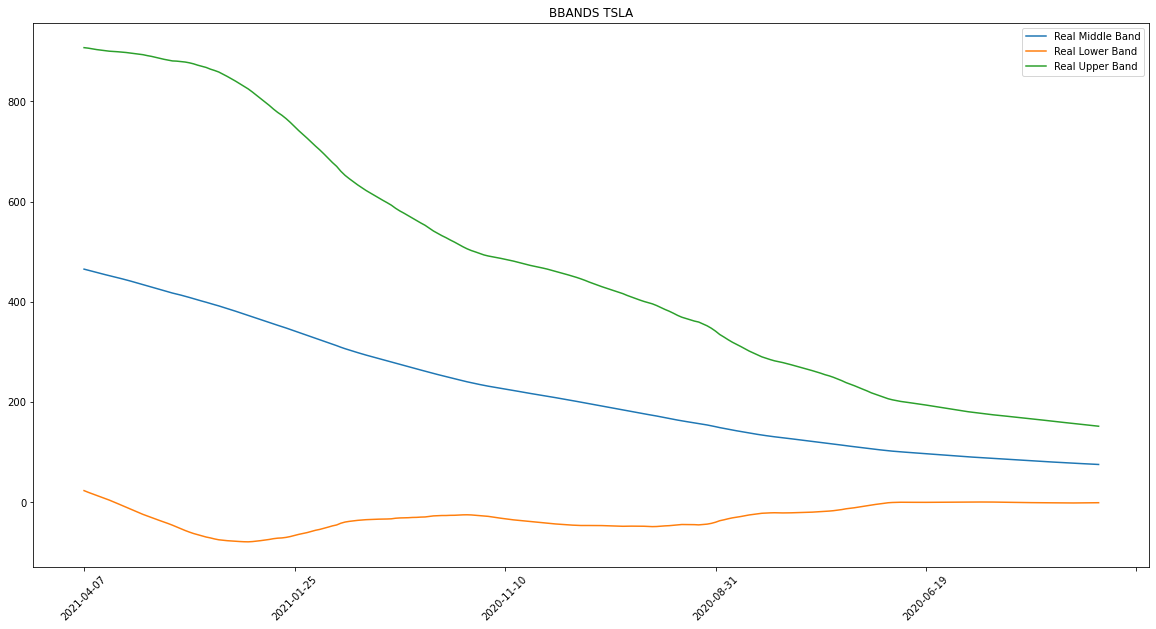

In [13]:
# Plot Bollinger Bands
bbands_df.plot(figsize=(20,10), title=f'BBANDS {ticker}', rot=45)